# Neural Network intuition

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/nhartman94/PALMS2024/blob/main/NN-intuition.ipynb)

**Goal:** Visually demonstrate that a NN is a universal function appproximator.

**Resources:**
-  Lukas Heinrich's "Deep Learning" lecture at Technical University of Munich
-  Michael Nielson's excellent [Neural Networks and Deep Learning](http://neuralnetworksanddeeplearning.com/chap4.html) book.

Nicole Hartman, June 2024

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

## Step 1: Introducing non-linearities

In [2]:
def relu(x):
    '''
    YOUR CODE HERE
    '''
    fx = 
    return fx

In [3]:
x = np.linspace(-10,10,100001)

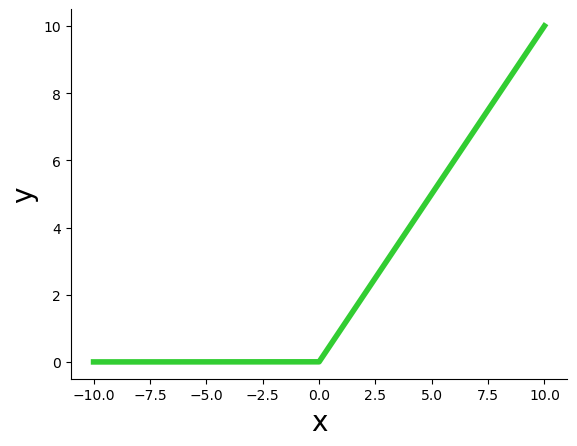

In [4]:
plt.plot(x,relu(x),color='limegreen',lw=4)
plt.xlabel('x',fontsize=20)
plt.ylabel('y',fontsize=20)

ax = plt.gca()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


**Other common activation functions**
- Sigmoid
- Silu
- Tanh ...

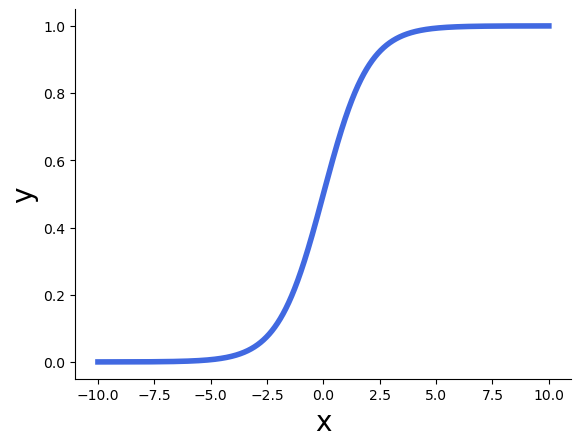

In [5]:
sigmoid = lambda x: 1 / (1+np.exp(-x))

plt.plot(x,sigmoid(x),color='royalblue',lw=4)
plt.xlabel('x',fontsize=20)
plt.ylabel('y',fontsize=20)

ax = plt.gca()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

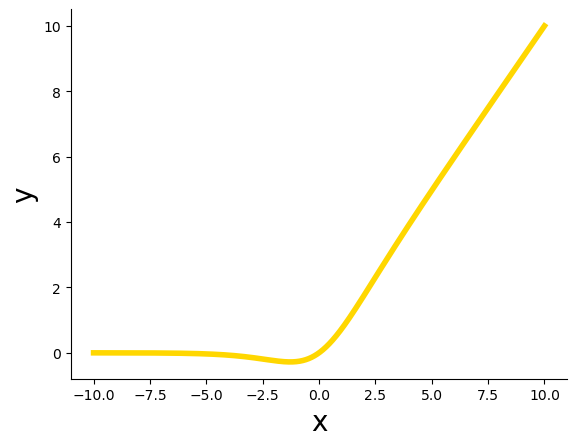

In [6]:
# SiLU
plt.plot(x,x*sigmoid(x),color='gold',lw=4)
plt.xlabel('x',fontsize=20)
plt.ylabel('y',fontsize=20)

ax = plt.gca()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.savefig(f'figures/silu.pdf')

## Step 2: Building up a "bump"

Let's combine non-linearities to get _more complicated structures_ !

Below is a widget for combining two linear models with these ReLU non-linearities.

(-5.0, 5.0)

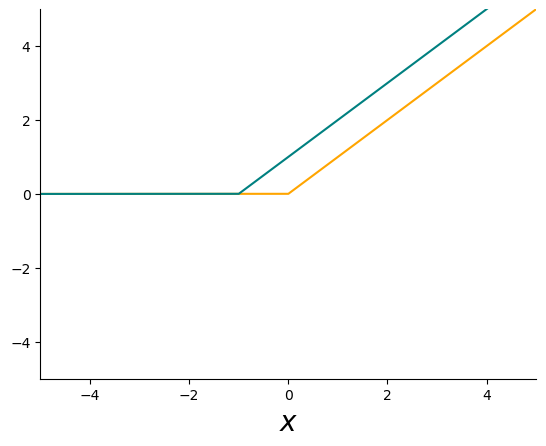

In [7]:
w21,w11,b11 = 1,1,0 
w22,w12,b12 = 1,1,1 # <- Varying b2 changes the kink of the non-linearity

a1 = w21 * relu(w11*x+b11)
a2 = w22 * relu(w12*x+b12)

plt.plot(x,a1,color='orange')
plt.plot(x,a2,color='teal')
plt.xlabel('$x$',fontsize=20)

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.xlim(-5,5)
plt.ylim(-5,5)

The default parameters create a "step function", when you vary the

In [24]:
def on_switch(w11=1,
              w12=1,
              #b11=0,
              b12=1,
              w21=1,  
              w22=1):
    '''
    Combine two "relu activations" to get an output
    '''

    b1=0 # fixed for this exercise
    
    a1 = w21 * relu(w11*x+b11)
    a2 = w22 * relu(w12*x+b12)
    
    plt.plot(x,a1,color='orange',alpha=0.3)
    plt.plot(x,a2,color='teal',alpha=0.3)
    
    plt.plot(x,a2-a1,color='crimson',)
    plt.xlabel('$x$',fontsize=20)

    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    plt.xlim(-5,5)
    plt.ylim(-5,5)

interact(on_switch, 
         w11=(0.1, 5, 0.1),
         w12=(0.1, 5, 0.1),
         b2=(-5,5),
         w21=(0.1, 5, 0.1),
         w22=(0.1, 5, 0.1),
        )

plt.show()

interactive(children=(FloatSlider(value=1.0, description='w11', max=5.0, min=0.1), FloatSlider(value=1.0, desc…

We've made a step function!!

(Can also be seen as an approximation to the "sigmoid" function non-linearity that we coded up above.)

**Note your observations from playing with the widget:**

(-5.0, 5.0)

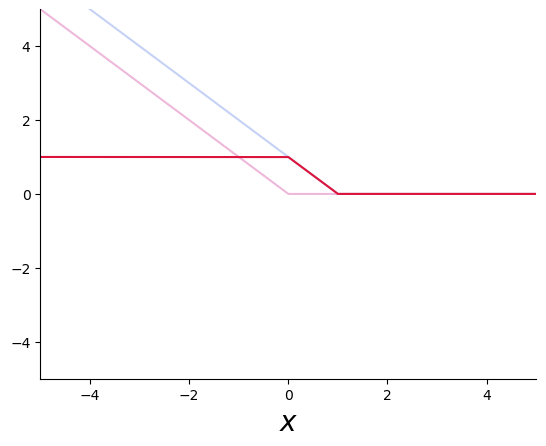

In [19]:
w13 = w14 = -1
w23 = w24 = 1


b13 = 0
b14 = b13 + 1

a3 = w23 * relu(w13*x+b13)
a4 = w24 * relu(w14*x+b14)

plt.plot(x,a3,color='mediumvioletred',alpha=.3)
plt.plot(x,a4,color='royalblue',alpha=.3)

plt.plot(x,a4-a3,color='crimson',)
plt.xlabel('$x$',fontsize=20)

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.xlim(-5,5)
plt.ylim(-5,5)


### Now we have the corresponding "off" switch!

Let's put the two pieces together... how do we get (?)

From the previous problem, we've learned what the relevant degrees of freedom are for building up the problem, so let's incorporate this in the widget creation.

In [20]:
def off_switch(loc=0,height=1):
    # Default values to reproduce the results in the slides
    # w23,w13,b13 = 1,-1,0 
    # w24,w14,b14 = 1,-1,1

    # Tie the weights that make sense to vary together
    w23 = w24 = height
    w13 = w14 = -10

    b13 = loc * abs(w13)
    b14 = b13 + 1
    
    a3 = w23 * relu(w13*x+b13)
    a4 = w24 * relu(w14*x+b14)
    
    plt.plot(x,a3,color='mediumvioletred',alpha=.3)
    plt.plot(x,a4,color='royalblue',alpha=.3)
    
    plt.plot(x,a4-a3,color='crimson',)
    plt.xlabel('$x$',fontsize=20)
    
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    plt.xlim(-5,5)
    plt.ylim(-5,5)

interact(off_switch, 
         loc=(-10,10,0.5)
        )
plt.show()

interactive(children=(FloatSlider(value=0.0, description='loc', max=10.0, min=-10.0, step=0.5), IntSlider(valu…

OK, to make it easier to parametrize the shift locations (?)

(-5.0, 5.0)

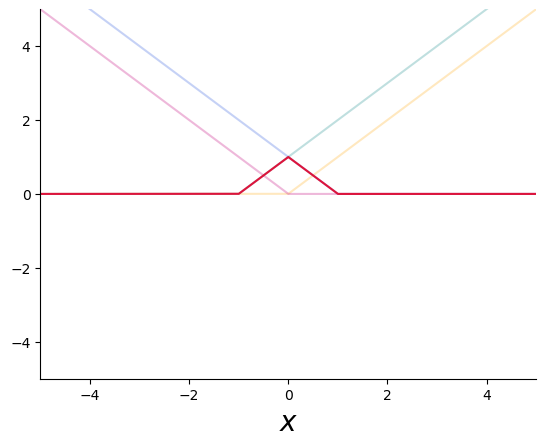

In [21]:
b2 = -1

plt.plot(x,a1,color='orange',alpha=0.25)
plt.plot(x,a2,color='teal',alpha=0.25)

plt.plot(x,a3,color='mediumvioletred',alpha=.3)
plt.plot(x,a4,color='royalblue',alpha=.3)

plt.plot(x,-a1 + a2 + a4-a3 + b2,color='crimson',)
plt.xlabel('$x$',fontsize=20)

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.xlim(-5,5)
plt.ylim(-5,5)


**Making a building block**

From the above, we saw we could vary locations for where the bump turns on and off.

In [13]:
def lego_block(start=0,stop=1,height=1):
    
    '''
    Write w1{1,2,3,4}, b1{1,2,3,4}, w2{1,2,3,4}
    in terms of these "start", "stop" and "height" locations
    '''
    w21 = w22 = w23 = w24 = height

    # Use a large w to have a sharp "turn on" curve
    w11 = w12 = 10
    w13 = w14 = - w11

    b11 = start * w11
    b12 = b11 + 1
    
    b13 = stop  * w13 
    b14 = b13+1
    
    b_out = height

    '''
    Compute the activations
    '''
    a1 = w21 * relu(w11*x+b11)
    a2 = w22 * relu(w12*x+b12)    

    a3 = w23 * relu(w13*x+b13)
    a4 = w24 * relu(w14*x+b14)    

    '''
    Draw the plot
    '''
    plt.plot(x,a1,color='orange',alpha=0.25)
    plt.plot(x,a2,color='teal',alpha=0.25)
    
    plt.plot(x,a3,color='mediumvioletred',alpha=.3)
    plt.plot(x,a4,color='royalblue',alpha=.3)

    plt.plot(x,a1 - a2 + a3-a4 + b_out,color='crimson',)
    plt.xlabel('$x$',fontsize=20)
    
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    plt.xlim(-5,5)
    plt.ylim(-5,5)

interact(lego_block, 
         start=(-5,5,0.2),
         stop=(-5,5,0.2),
         height=(-3,3,.1)
        )
plt.show()

interactive(children=(FloatSlider(value=0.0, description='start', max=5.0, min=-5.0, step=0.2), FloatSlider(va…

Given these "blocks" we can now construct arbitrary functions, and this is a visual proof of the following thm.

**Universal approximation theorem:** Can approximate any continuous function to aribtrary precision with a suffiently large number of neurons.

Or, using the formalism above: for large enough $k$, there exists some $w_{1k}, b_{1k}, w_{2k}, b_2$ such that:

$$f(x) \approx \sum_k w_{2k} \mathrm{ReLU}(w_{1k} x + b_{1k}) + b_2.$$

B/c we have 1d inputs and outputs, the $w_1$ and $w_2$ are vectors, but in the general case of multi-dim input and output, they will be matrices.